<a href="https://colab.research.google.com/github/Akanksha-Gopu/Anemia-Prediction/blob/main/Anemia_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, precision_score, confusion_matrix, f1_score, recall_score

In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/anemia_dataset.csv')
df.head()

,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13
0,1,Jafor Alam,43.2555,30.8421,25.9025,6.3,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,khadiza,45.6033,28.1900,26.2067,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Lalu,45.0107,28.9677,26.0215,11.7,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,Mira nath,44.5398,28.9899,26.4703,13.5,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,monoara,43.2870,30.6972,26.0158,12.4,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.shape

(104, 14)

In [ ]:
df.isnull().sum()

,0
Number,0
Name,0
%Red Pixel,0
%Green pixel,0
%Blue pixel,0
Hb,0
Anaemic,0
Unnamed: 7,104
Unnamed: 8,104
Unnamed: 9,104


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Number        104 non-null    int64  
 1   Name          104 non-null    object 
 2   %Red Pixel    104 non-null    float64
 3   %Green pixel  104 non-null    float64
 4   %Blue pixel   104 non-null    float64
 5   Hb            104 non-null    float64
 6   Anaemic       104 non-null    object 
 7   Unnamed: 7    0 non-null      float64
 8   Unnamed: 8    0 non-null      float64
 9   Unnamed: 9    0 non-null      float64
 10  Unnamed: 10   0 non-null      float64
 11  Unnamed: 11   0 non-null      float64
 12  Unnamed: 12   0 non-null      float64
 13  Unnamed: 13   1 non-null      object 
dtypes: float64(10), int64(1), object(3)
memory usage: 11.5+ KB


In [ ]:
df.describe()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
count,104.000000,104.000000,104.000000,104.000000,104.000000,0.0,0.0,0.0,0.0,0.0,0.0
mean,52.500000,45.654175,28.875507,25.470325,12.150962,NaN,NaN,NaN,NaN,NaN,NaN
std,30.166206,2.816294,1.554275,1.984671,2.512957,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,38.796800,25.140300,19.541300,2.800000,NaN,NaN,NaN,NaN,NaN,NaN
25%,26.750000,43.911375,27.871300,24.896425,10.650000,NaN,NaN,NaN,NaN,NaN,NaN
50%,52.500000,45.385350,28.948750,25.953200,12.600000,NaN,NaN,NaN,NaN,NaN,NaN
75%,78.250000,46.968325,29.887275,26.721600,14.000000,NaN,NaN,NaN,NaN,NaN,NaN
max,104.000000,54.647800,32.368100,29.841400,16.300000,NaN,NaN,NaN,NaN,NaN,NaN


# Preprocessing

In [ ]:
df.columns

Index(['Number', 'Name', '%Red Pixel', '%Green pixel', '%Blue pixel', 'Hb',
       'Anaemic', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'],
      dtype='object')

In [ ]:
# Drop Uncessary Columns
df.drop(columns=['Name','Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10',
       'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13'], axis=1, inplace=True)

# EDA

In [ ]:
df.head()

,Number,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
0,1,43.2555,30.8421,25.9025,6.3,Yes
1,2,45.6033,28.1900,26.2067,13.5,No
2,3,45.0107,28.9677,26.0215,11.7,No
3,4,44.5398,28.9899,26.4703,13.5,No
4,5,43.2870,30.6972,26.0158,12.4,No


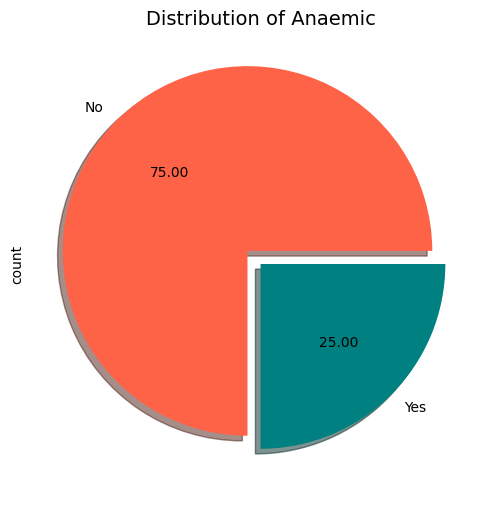

In [ ]:
df['Anaemic'].value_counts().plot(kind='pie', autopct='%.2f', shadow=True, colors=['tomato', 'teal'],
                                  explode=[0.1,0], figsize=(9,6))
plt.title('Distribution of Anaemic', fontsize=14)
plt.show()

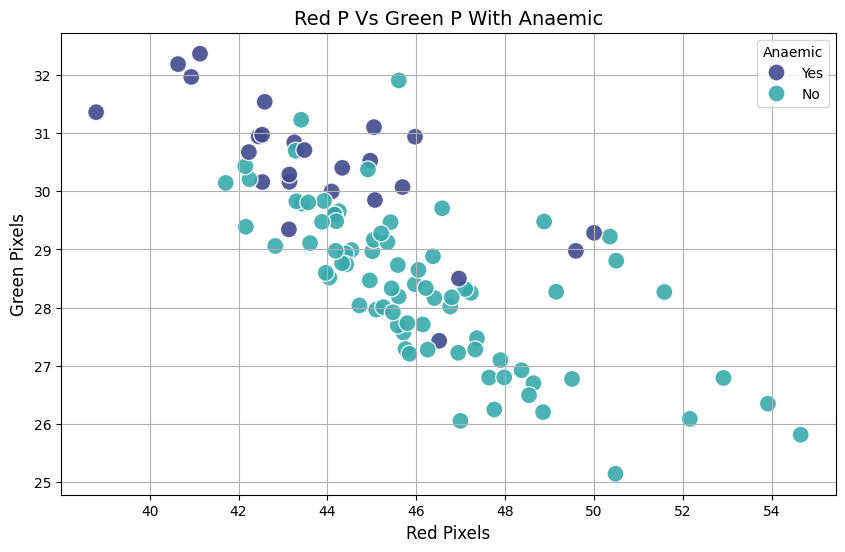

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['%Red Pixel'], y=df['%Green pixel'], hue=df['Anaemic'], palette='mako', alpha=0.9, s=150)
plt.title('Red P Vs Green P With Anaemic', fontsize=14)
plt.xlabel('Red Pixels', fontsize=12)
plt.ylabel('Green Pixels', fontsize=12)

plt.grid()
plt.show()

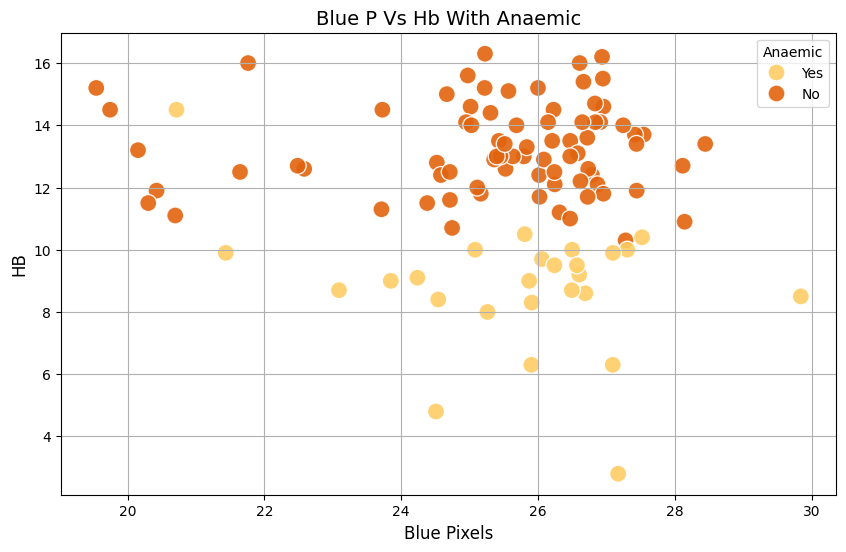

In [ ]:
plt.figure(figsize=(10,6))
sns.scatterplot(x=df['%Blue pixel'], y=df['Hb'], palette='YlOrBr', alpha=0.9, s=150, hue=df['Anaemic'])
plt.title('Blue P Vs Hb With Anaemic', fontsize=14)
plt.xlabel('Blue Pixels', fontsize=12)
plt.ylabel('HB', fontsize=12)

plt.grid()
plt.show()

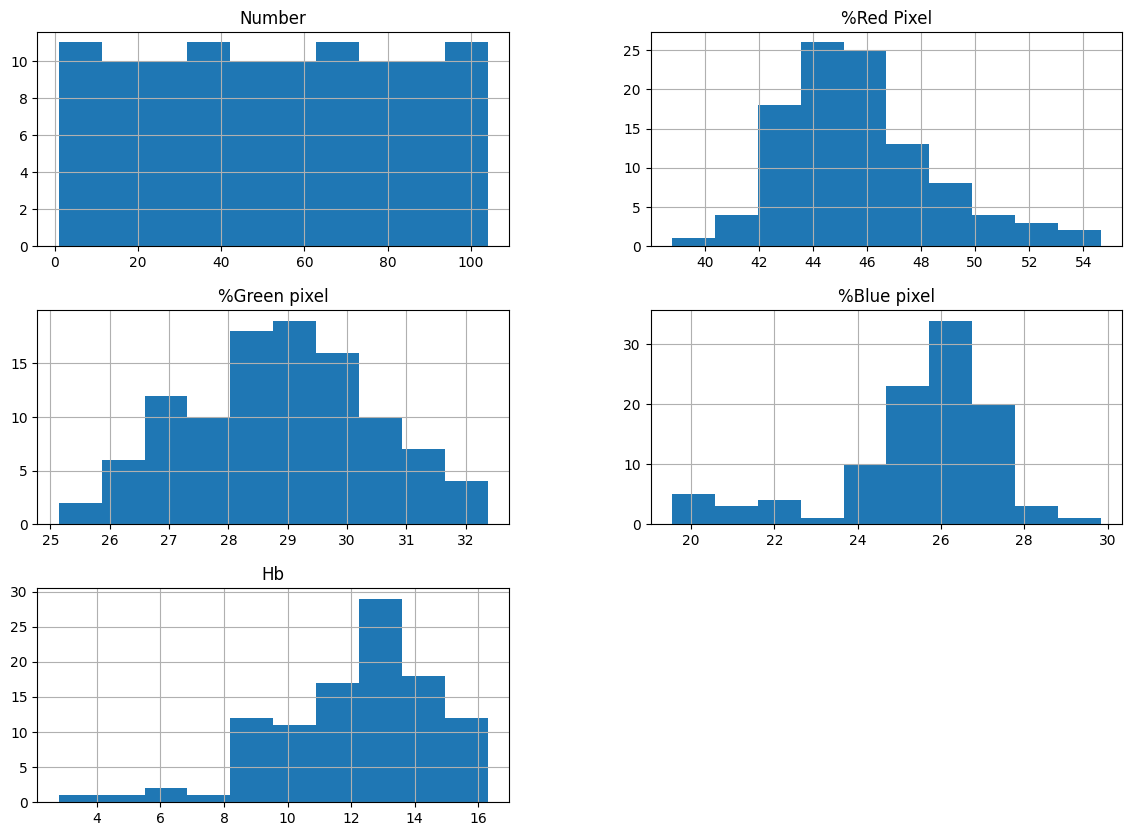

In [ ]:
df.hist(figsize=(14,10))
plt.show()

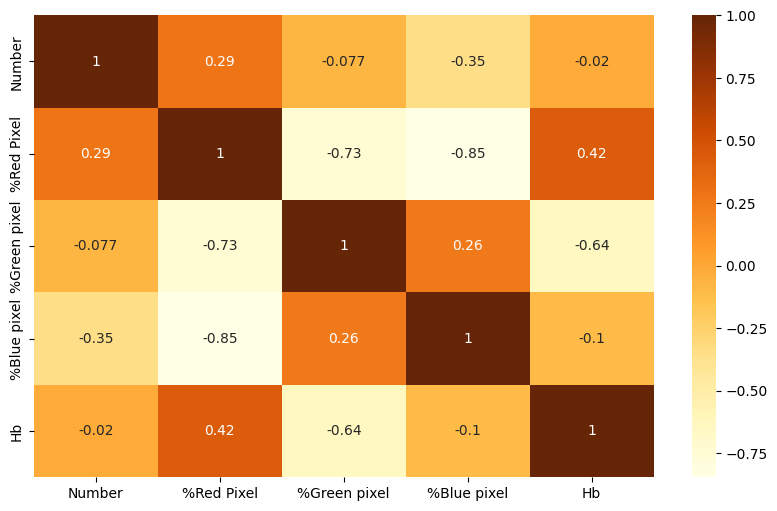

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='YlOrBr')
plt.show()

# Label Encoding

In [ ]:
le = LabelEncoder()
df['Anaemic'] = le.fit_transform(df['Anaemic'])

# Data Split Into Training and Testing Sets

In [ ]:
X = df.drop('Anaemic', axis=1)
y = df['Anaemic']

X_train,X_test, y_train,y_test = train_test_split(X,y , test_size=0.3)
print(f"X_train Shape: {X_train.shape}")
print(f"Y_train Shape: {y_train.shape}")
print(f"X_test Shape: {X_test.shape}")
print(f"y_test Shape: {y_test.shape}")

X_train Shape: (72, 5)
Y_train Shape: (72,)
X_test Shape: (32, 5)
y_test Shape: (32,)


# Models Building

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "SVM": SVC(),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Decision Tree": DecisionTreeClassifier()
}


📙 Name: Logistic Regression
Accuracy: 0.97
Precision Score: 0.8888888888888888


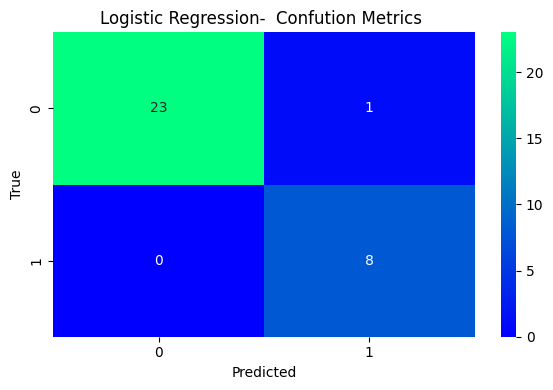


📙 Name: Random Forest
Accuracy: 0.97
Precision Score: 0.8888888888888888


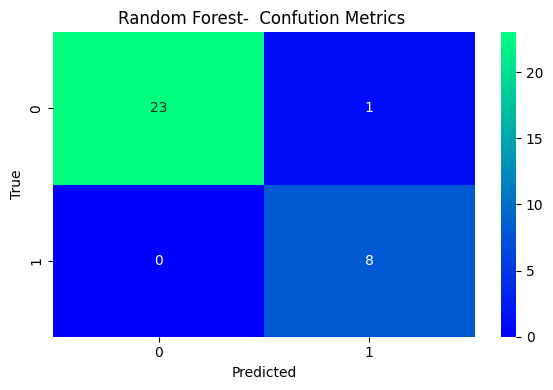


📙 Name: Gradient Boosting
Accuracy: 0.94
Precision Score: 0.8


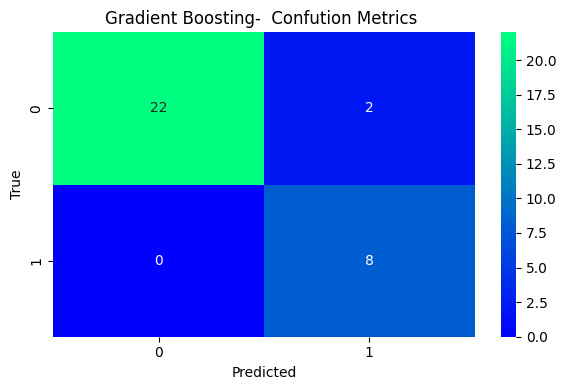


📙 Name: SVM
Accuracy: 0.75
Precision Score: 0.0


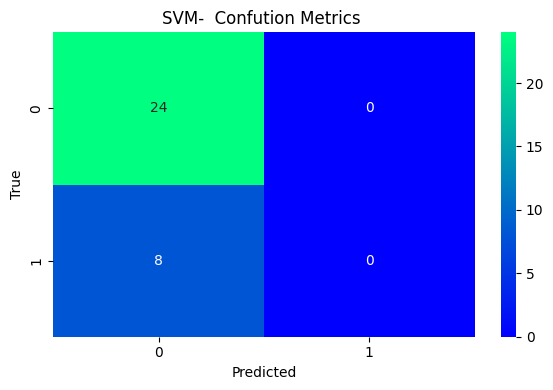


📙 Name: K-Nearest Neighbors
Accuracy: 0.91
Precision Score: 1.0


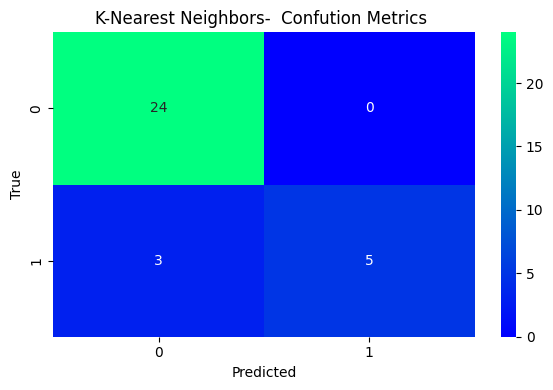


📙 Name: Naive Bayes
Accuracy: 0.91
Precision Score: 0.7272727272727273


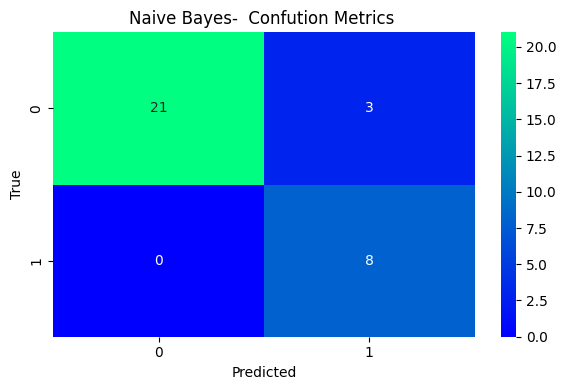


📙 Name: Decision Tree
Accuracy: 0.91
Precision Score: 0.7272727272727273


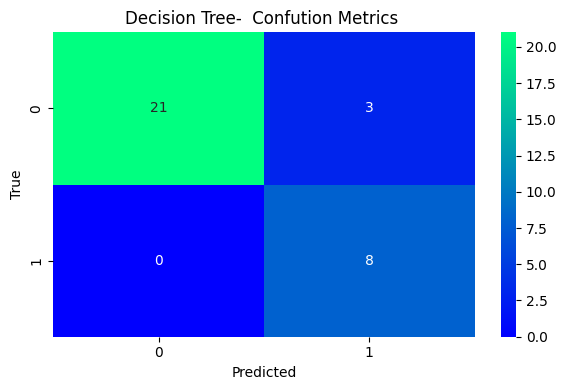


📙 Summary:


,Model,Test Accuracy,Precision Score,Recall Score,F1 Score
0,Logistic Regression,0.96875,0.888889,0.979167,0.959950
1,Random Forest,0.96875,0.888889,0.979167,0.959950
2,Gradient Boosting,0.93750,0.800000,0.958333,0.922705
3,SVM,0.75000,0.000000,0.500000,0.428571
4,K-Nearest Neighbors,0.90625,1.000000,0.812500,0.855204
5,Naive Bayes,0.90625,0.727273,0.937500,0.887719
6,Decision Tree,0.90625,0.727273,0.937500,0.887719


In [ ]:
summary=[]
for names, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)
    acc = accuracy_score(y_test, preds)
    prec = precision_score(y_test, preds)
    recal = recall_score(y_test, preds, average='macro')
    f1 = f1_score(y_test, preds,  average='macro')
    print(f"\n📙 Name: {names}")
    print(f"Accuracy: {acc:.2f}")
    print(f"Precision Score: {prec}")

    plt.figure(figsize=(6, 4))
    cm  = confusion_matrix(y_test,preds)
    sns.heatmap(cm, annot=True, cmap='winter')
    plt.title(f"{names}-  Confution Metrics ")
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.tight_layout()
    plt.show()

    summary.append({
        'Model': names,
        'Test Accuracy': acc,
        'Precision Score': prec,
        'Recall Score': recal,
        'F1 Score': f1

    })
    summary_df = pd.DataFrame(summary)

# Show all model evaluation metrics in one table
print("\n📙 Summary:")
summary_df

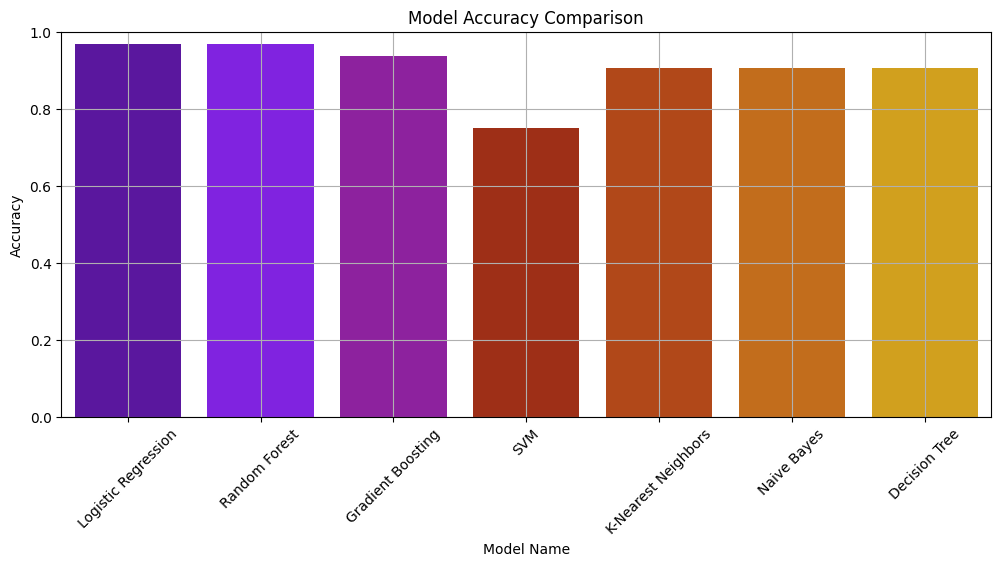

In [ ]:
plt.figure(figsize=(12, 5))
sns.barplot(data=summary_df, x='Model', y='Test Accuracy', palette='gnuplot')
plt.title("Model Accuracy Comparison")
plt.xlabel('Model Name')
plt.ylabel("Accuracy")
plt.grid()
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.show()